# Importation des données

In [101]:

#On importe tout d'abord lesdeux librairies sur lesquels nous sommes susceptibles de travailler par la suite


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:

#On importe également l'ensemble des ficheier de notre BDD en les transformant en DataFrames


In [104]:
dispo_alim = pd.read_csv('dispo_alimentaire.csv')
dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [105]:

# En important les DF, on s'assurent que les noms des colonnes qu'on utilise soint explicites et différenciables


In [106]:

# On s'assurre également que des DF s'expriment dans des unités identiques


In [107]:
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')
aide_alimentaire["Valeur"] = (aide_alimentaire["Valeur"]*1000)
aide_alimentaire.rename(columns = {'Valeur': "Quantité d'aide alimentaire(Kg)"}, inplace = True)
aide_alimentaire.tail()

,Pays bénéficiaire,Année,Produit,Quantité d'aide alimentaire(Kg)
1470,Zimbabwe,2015,Mélanges et préparations,96000
1471,Zimbabwe,2013,Non-céréales,5022000
1472,Zimbabwe,2014,Non-céréales,2310000
1473,Zimbabwe,2015,Non-céréales,306000
1474,Zimbabwe,2013,"Riz, total",64000


In [108]:
population = pd.read_csv('population.csv')
population['Valeur'] = (population['Valeur']*1000).astype(int)
population.rename(columns = {'Valeur': 'Population'}, inplace = True)
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113


In [109]:
sous_nutrition = pd.read_csv('sous_nutrition.csv')
sous_nutrition.rename(columns = {'Valeur': 'Nb de personnes en sous alimentation(M Ha)'}, inplace = True)
sous_nutrition.tail()

,Zone,Année,Nb de personnes en sous alimentation(M Ha)
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN
1217,Zimbabwe,2017-2019,NaN


# Nettoyage de données

In [110]:

#On doit enlever d'abord tous les individus avec des valeurs manquantes pour la suite de notre analyse


In [111]:
sous_nutrition = sous_nutrition.dropna()
sous_nutrition.tail()

,Zone,Année,Nb de personnes en sous alimentation(M Ha)
1195,Viet Nam,2013-2015,8.3
1196,Viet Nam,2014-2016,7.6
1197,Viet Nam,2015-2017,7.1
1198,Viet Nam,2016-2018,6.5
1199,Viet Nam,2017-2019,6.1


In [112]:

#On ne laisse que les nombres décimaux en remplaçant "<0.1" par "0"


In [113]:
sous_nutrition['Nb de personnes en sous alimentation(M Ha)']=sous_nutrition['Nb de personnes en sous alimentation(M Ha)'].replace("<0.1","0")

In [114]:

# On vérifie de quel type de donnée il s'agit pour savoir ce que l'on doit faire avec


In [115]:
sous_nutrition.dtypes

Zone                                          object
Année                                         object
Nb de personnes en sous alimentation(M Ha)    object
dtype: object

In [116]:

#on change le type de donnée dans la colonne valeur


In [117]:
sous_nutrition['Nb de personnes en sous alimentation(M Ha)'] = sous_nutrition['Nb de personnes en sous alimentation(M Ha)'].astype(float)
sous_nutrition.head()

,Zone,Année,Nb de personnes en sous alimentation(M Ha)
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [118]:

#on revérefie que le changement a bien eu lieux


In [119]:
sous_nutrition.dtypes

Zone                                           object
Année                                          object
Nb de personnes en sous alimentation(M Ha)    float64
dtype: object

In [120]:

#on converti les données dans la même unité que le DF population en multipliant par 1 000 000


In [121]:
sous_nutrition['Nb de personnes en sous alimentation(M Ha)'] = (sous_nutrition['Nb de personnes en sous alimentation(M Ha)']*1000000).astype(int)
sous_nutrition.tail()

,Zone,Année,Nb de personnes en sous alimentation(M Ha)
1195,Viet Nam,2013-2015,8300000
1196,Viet Nam,2014-2016,7600000
1197,Viet Nam,2015-2017,7100000
1198,Viet Nam,2016-2018,6500000
1199,Viet Nam,2017-2019,6100000


In [122]:

#On renomme la colonne en passant de (M Ha) en (ha)


In [123]:
sous_nutrition.rename(columns = {'Nb de personnes en sous alimentation(M Ha)': 'Nb de personnes en sous alimentation'}, inplace = True)
sous_nutrition

,Zone,Année,Nb de personnes en sous alimentation
0,Afghanistan,2012-2014,8600000
1,Afghanistan,2013-2015,8800000
2,Afghanistan,2014-2016,8900000
3,Afghanistan,2015-2017,9700000
4,Afghanistan,2016-2018,10500000
...,...,...,...
1195,Viet Nam,2013-2015,8300000
1196,Viet Nam,2014-2016,7600000
1197,Viet Nam,2015-2017,7100000
1198,Viet Nam,2016-2018,6500000


In [124]:

#On sélectionne uniquement l'année 2016-2018 pour avoir les données moyennes sur 2017 en utilisant un tri


In [125]:
sous_nutrition_2017 = sous_nutrition.loc[sous_nutrition['Année']=='2016-2018', :]
sous_nutrition_2017

,Zone,Année,Nb de personnes en sous alimentation
4,Afghanistan,2016-2018,10500000
10,Afrique du Sud,2016-2018,3100000
16,Albanie,2016-2018,100000
22,Algérie,2016-2018,1300000
40,Angola,2016-2018,5800000
...,...,...,...
1156,Turkménistan,2016-2018,200000
1174,Ukraine,2016-2018,1500000
1186,Vanuatu,2016-2018,0
1192,Venezuela (République bolivarienne du),2016-2018,8000000


In [126]:

#On sélectionne uniquement l'année 2017 en utilisant un tri


In [127]:
population_2017 = population.loc[population['Année']==2017, :]
population_2017

,Zone,Année,Population
4,Afghanistan,2017,36296113
10,Afrique du Sud,2017,57009756
16,Albanie,2017,2884169
22,Algérie,2017,41389189
28,Allemagne,2017,82658409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402484
1396,Viet Nam,2017,94600648
1402,Yémen,2017,27834819
1408,Zambie,2017,16853599


In [128]:

#On fusionne(merge) les deux DataFrame par Zone de DF sous_nutrition_2017


In [129]:
pop_sous_nutrition_2017 = pd.merge(sous_nutrition_2017,population_2017, on = 'Zone', how = 'outer')




# Q1: La proportion de personnes en état de sous-nutrition dans la population mondiale





In [130]:

#On crée une nouvelle colonne qui nous montre le ratio 100 * nb_pers_sous_alim / pop 


In [131]:
pop_sous_nutrition_2017['Personne ne sous nutrition (%)'] = round(pop_sous_nutrition_2017['Nb de personnes en sous alimentation']*100/pop_sous_nutrition_2017['Population'],2)
pop_sous_nutrition_2017 = pop_sous_nutrition_2017.dropna()
pop_sous_nutrition_2017['Nb de personnes en sous alimentation']=pop_sous_nutrition_2017['Nb de personnes en sous alimentation'].astype(int)
pop_sous_nutrition_2017.tail()

,Zone,Année_x,Nb de personnes en sous alimentation,Année_y,Population,Personne ne sous nutrition (%)
99,Turkménistan,2016-2018,200000,2017,5757667,3.47
100,Ukraine,2016-2018,1500000,2017,44487709,3.37
101,Vanuatu,2016-2018,0,2017,285510,0.00
102,Venezuela (République bolivarienne du),2016-2018,8000000,2017,29402484,27.21
103,Viet Nam,2016-2018,6500000,2017,94600648,6.87


In [132]:

# On suprime la colonne Année_x qui est inutile et on renomme Année_y en Année


In [133]:
del pop_sous_nutrition_2017 ['Année_x']
pop_sous_nutrition_2017.rename(columns = {'Année_y': 'Année'}, inplace = True)
pop_sous_nutrition_2017['Année']=pop_sous_nutrition_2017['Année'].astype(str)
pop_sous_nutrition_2017.head()

,Zone,Nb de personnes en sous alimentation,Année,Population,Personne ne sous nutrition (%)
0,Afghanistan,10500000,2017,36296113,28.93
1,Afrique du Sud,3100000,2017,57009756,5.44
2,Albanie,100000,2017,2884169,3.47
3,Algérie,1300000,2017,41389189,3.14
4,Angola,5800000,2017,29816766,19.45


In [134]:
mond_prop_pop_sous_nut_2017 = round(100*pop_sous_nutrition_2017['Nb de personnes en sous alimentation'].sum()/population_2017['Population'].sum(),2)
print("Il y avait :",mond_prop_pop_sous_nut_2017, " de % de gens en sous-alimentation en 2017 dans la population mondiale.")

Il y avait : 7.1  de % de gens en sous-alimentation en 2017 dans la population mondiale.





# Q2: Le nombre théorique de personnes qui pourraient être nourries. 




In [135]:
# somme des dispo alim = dispo alim mond

# On considère qu'il faut 2500 KCal/j pour un homme adulte ce qui nous servira de base de calcul

In [136]:
# On regroupe les Dispo alim par Pays

DA_group = dispo_alim.groupby('Zone')[["Disponibilité alimentaire (Kcal/personne/jour)"]].sum().astype(int)
DA_group.head()

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,2087
Afrique du Sud,3020
Albanie,3188
Algérie,3293
Allemagne,3503


In [137]:

# on peut maintenant fusionner les deux DF


In [138]:
merge_DA_pop_2017 = pd.merge(DA_group,population_2017, on = 'Zone', how = 'outer')

In [139]:

# On calcul la dispo alimentaire mondiale par jour en Kcal


In [140]:
dispo_al_mondiale = (merge_DA_pop_2017['Disponibilité alimentaire (Kcal/personne/jour)']*merge_DA_pop_2017['Population']).sum()
dispo_al_mondiale

20918984609007.0

In [141]:

# On calcule le nombre de personnes et la part qu'ils representent


In [142]:
nb_th = int(dispo_al_mondiale/2500)
prop_nb_th = round(100*(nb_th)/(merge_DA_pop_2017['Population'].sum()),2)
print("La part de personne qui pourrait théoriquement être nourries au vu des calories disponible est de :",prop_nb_th ,"%")
print("Ce qui represente environ : ", round(nb_th/1000000000,2), "de milliards de personnes")


La part de personne qui pourrait théoriquement être nourries au vu des calories disponible est de : 110.86 %
Ce qui represente environ :  8.37 de milliards de personnes



# Q3: Nombre théorique de personnes qui pourrait être nourri pour la disponibilité alimentaire des produits végétaux 


In [143]:

# On séléctionne les dispo alimentaire d'origine végétale uniquement


In [144]:
dispo_vege = dispo_alim.loc[dispo_alim['Origine']=='vegetale', :]

In [145]:

# Puis on les regoupe par pays


In [146]:
DA_group_vege = dispo_vege.groupby('Zone')[["Disponibilité alimentaire (Kcal/personne/jour)"]].sum().astype(int)
DA_group_vege.head()

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,1871
Afrique du Sud,2533
Albanie,2203
Algérie,2915
Allemagne,2461


In [147]:

# On fusionne les deux DF pour faciliter les calculs


In [148]:
merge_DA_vege_pop_2017 = pd.merge(DA_group_vege,population_2017, on = 'Zone', how = 'outer')

In [149]:

# On calcule la dispo alimentaire mondiale pour les produit végétaux


In [150]:
dispo_al_mondiale_vege = (merge_DA_vege_pop_2017['Disponibilité alimentaire (Kcal/personne/jour)']*merge_DA_vege_pop_2017['Population']).sum()

In [151]:

# On calcul le nombre et le ratio théorique des pers qui pourrait être nourri uniquement avec des produit d'origine végé.


In [152]:
nb_th_vege = int(round(dispo_al_mondiale_vege/2500,0))
ratio_nb_th_vege = round(100*(dispo_al_mondiale_vege/2500)/(merge_DA_vege_pop_2017['Population'].sum()),2)

print("Théoriquement il serait possible de nourrir :", round(nb_th_vege/1000000000,3), "milliards de personnes en tenant compte uniquement de la disponibilité alimentaire des produits végétaux")
print("Ce qui represente : ", ratio_nb_th_vege, "% des besoins alimentaires de la population modniale")

Théoriquement il serait possible de nourrir : 6.904 milliards de personnes en tenant compte uniquement de la disponibilité alimentaire des produits végétaux
Ce qui represente :  91.47 % des besoins alimentaires de la population modniale





# Q4: La part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est utilisée pour l'alimentation humaine





In [153]:
dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [154]:
dispo_int = dispo_alim['Disponibilité intérieure'].sum()

for elt in ['Aliments pour animaux', 'Pertes', 'Nourriture']:
    print("La proportion de", elt, "est de :", "{:.2f}".format(dispo_alim[elt].sum()*100/dispo_int), "%")

La proportion de Aliments pour animaux est de : 13.24 %
La proportion de Pertes est de : 4.61 %
La proportion de Nourriture est de : 49.51 %






# Q5: Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017





In [155]:
pop_sous_nutrition_2017.sort_values('Personne ne sous nutrition (%)', ascending = False).head()

,Zone,Nb de personnes en sous alimentation,Année,Population,Personne ne sous nutrition (%)
41,Haïti,5300000,2017,10982366,48.26
82,République populaire démocratique de Corée,12000000,2017,25429825,47.19
57,Madagascar,10500000,2017,25570512,41.06
55,Libéria,1800000,2017,4702226,38.28
53,Lesotho,800000,2017,2091534,38.25






# Q6: Les pays qui ont le plus bénéficié d’aide alimentaire depuis 2013





In [156]:
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Quantité d'aide alimentaire(Kg)
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


In [157]:
aide_alim_group = aide_alimentaire.groupby('Pays bénéficiaire')[["Quantité d'aide alimentaire(Kg)"]].sum()
aide_alim_group.head()

,Quantité d'aide alimentaire(Kg)
Pays bénéficiaire,
Afghanistan,185452000
Algérie,81114000
Angola,5014000
Bangladesh,348188000
Bhoutan,2666000


In [158]:

#Le classement des pays qui ont le plus bénéficier d'aide alimentaire entre 2013 et 2016


In [159]:
aide_alim_group.sort_values("Quantité d'aide alimentaire(Kg)", ascending = False).head(10).reset_index() 

,Pays bénéficiaire,Quantité d'aide alimentaire(Kg)
0,République arabe syrienne,1858943000
1,Éthiopie,1381294000
2,Yémen,1206484000
3,Soudan du Sud,695248000
4,Soudan,669784000
5,Kenya,552836000
6,Bangladesh,348188000
7,Somalie,292678000
8,République démocratique du Congo,288502000
9,Niger,276344000






# Q7: Les pays ayant le plus/le moins de disponibilité alimentaire par habitant





In [160]:
#On supprime des valeurs manquantes

In [161]:
merge_DA_pop_2017  =  merge_DA_pop_2017.dropna()

In [162]:
#On vérifie le type de chaque colonne

In [163]:
merge_DA_pop_2017.dtypes

Zone                                               object
Disponibilité alimentaire (Kcal/personne/jour)    float64
Année                                             float64
Population                                        float64
dtype: object

In [164]:
#On change le type des colonnes en passant de float en entier pour le tableau final

In [165]:
merge_DA_pop_2017['Année'] = merge_DA_pop_2017['Année'].astype(int)
merge_DA_pop_2017['Disponibilité alimentaire (Kcal/personne/jour)'] = merge_DA_pop_2017['Disponibilité alimentaire (Kcal/personne/jour)'].astype(int)
merge_DA_pop_2017['Population'] = merge_DA_pop_2017['Population'].astype(int)

In [166]:
merge_DA_pop_2017.sort_values("Disponibilité alimentaire (Kcal/personne/jour)", ascending = True).reset_index(drop=True).dropna()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population
0,République centrafricaine,1879,2017,4596023
1,Zambie,1924,2017,16853599
2,Madagascar,2056,2017,25570512
3,Afghanistan,2087,2017,36296113
4,Haïti,2089,2017,10982366
...,...,...,...,...
167,Israël,3610,2017,8243848
168,États-Unis d'Amérique,3682,2017,325084756
169,Turquie,3708,2017,81116450
170,Belgique,3737,2017,11419748


# Détails du graphique de l'utilisation de Manioc en Thaïlande

In [167]:
thai_stat = pd.read_csv('FAO_thai.csv')
thai_stat.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),216,Thaïlande,5511,Production,2532,Manioc et produits,2013,2013,Milliers de tonnes,30228,I,Valeur imputée
1,FBS,Bilans Alimentaires (2010-),216,Thaïlande,5911,Exportations - Quantité,2532,Manioc et produits,2013,2013,Milliers de tonnes,25214,I,Valeur imputée
2,FBS,Bilans Alimentaires (2010-),216,Thaïlande,5511,Production,2532,Manioc et produits,2014,2014,Milliers de tonnes,30022,I,Valeur imputée
3,FBS,Bilans Alimentaires (2010-),216,Thaïlande,5911,Exportations - Quantité,2532,Manioc et produits,2014,2014,Milliers de tonnes,26009,I,Valeur imputée
4,FBS,Bilans Alimentaires (2010-),216,Thaïlande,5511,Production,2532,Manioc et produits,2015,2015,Milliers de tonnes,32358,I,Valeur imputée


In [168]:
#On travaille sur la copie
thai_stat_copy = thai_stat.copy()

#On supprime les colonnes inutiles
thai_stat_copy = thai_stat.drop(thai_stat.columns[[0,1,2,3,4,6,7,8,10,12,13]],axis=1)
thai_stat_copy.head()

,Élément,Année,Valeur
0,Production,2013,30228
1,Exportations - Quantité,2013,25214
2,Production,2014,30022
3,Exportations - Quantité,2014,26009
4,Production,2015,32358


In [169]:
#On reprend la Thaïlande dans nos DF

In [170]:
thai_sous_nut = sous_nutrition.loc[sous_nutrition['Zone']=='Thaïlande', :].reset_index(drop=True).reset_index()
thai_sous_nut.head()

,index,Zone,Année,Nb de personnes en sous alimentation
0,0,Thaïlande,2012-2014,6200000
1,1,Thaïlande,2013-2015,6000000
2,2,Thaïlande,2014-2016,5900000
3,3,Thaïlande,2015-2017,6000000
4,4,Thaïlande,2016-2018,6200000


In [171]:
thai_pop = population.loc[population['Zone']=='Thaïlande', :].reset_index(drop=True).reset_index()
thai_pop.head()

,index,Zone,Année,Population
0,0,Thaïlande,2013,68144518
1,1,Thaïlande,2014,68438746
2,2,Thaïlande,2015,68714511
3,3,Thaïlande,2016,68971308
4,4,Thaïlande,2017,69209810


In [172]:
merge_thai_pop_sous_nut = pd.merge(thai_sous_nut,thai_pop, on = 'index', how = 'inner') 
merge_thai_pop_sous_nut

,index,Zone_x,Année_x,Nb de personnes en sous alimentation,Zone_y,Année_y,Population
0,0,Thaïlande,2012-2014,6200000,Thaïlande,2013,68144518
1,1,Thaïlande,2013-2015,6000000,Thaïlande,2014,68438746
2,2,Thaïlande,2014-2016,5900000,Thaïlande,2015,68714511
3,3,Thaïlande,2015-2017,6000000,Thaïlande,2016,68971308
4,4,Thaïlande,2016-2018,6200000,Thaïlande,2017,69209810
5,5,Thaïlande,2017-2019,6500000,Thaïlande,2018,69428453


In [173]:
merge_thai_pop_sous_nut['prop_en_sous_nut (%)']= round(100*merge_thai_pop_sous_nut['Nb de personnes en sous alimentation']/merge_thai_pop_sous_nut['Population'],2)
merge_thai_pop_sous_nut

,index,Zone_x,Année_x,Nb de personnes en sous alimentation,Zone_y,Année_y,Population,prop_en_sous_nut (%)
0,0,Thaïlande,2012-2014,6200000,Thaïlande,2013,68144518,9.10
1,1,Thaïlande,2013-2015,6000000,Thaïlande,2014,68438746,8.77
2,2,Thaïlande,2014-2016,5900000,Thaïlande,2015,68714511,8.59
3,3,Thaïlande,2015-2017,6000000,Thaïlande,2016,68971308,8.70
4,4,Thaïlande,2016-2018,6200000,Thaïlande,2017,69209810,8.96
5,5,Thaïlande,2017-2019,6500000,Thaïlande,2018,69428453,9.36


In [174]:
merge_thai_pop_sous_nut.rename(columns = {'Année_y': 'Année'}, inplace = True)
merge_thai_pop_sous_nut.drop(merge_thai_pop_sous_nut.columns[[0,1,2,3,4,6]],axis = 1,inplace = True)
merge_thai_pop_sous_nut

,Année,prop_en_sous_nut (%)
0,2013,9.10
1,2014,8.77
2,2015,8.59
3,2016,8.70
4,2017,8.96
5,2018,9.36


In [175]:
thailande_final = pd.merge(merge_thai_pop_sous_nut,thai_stat_copy, on = 'Année', how = 'right')
thailande_final.tail(20)

,Année,prop_en_sous_nut (%),Élément,Valeur
0,2013,9.10,Production,30228
1,2013,9.10,Exportations - Quantité,25214
2,2014,8.77,Production,30022
3,2014,8.77,Exportations - Quantité,26009
4,2015,8.59,Production,32358
5,2015,8.59,Exportations - Quantité,30995
6,2016,8.70,Production,31161
7,2016,8.70,Exportations - Quantité,30080
8,2017,8.96,Production,30495
9,2017,8.96,Exportations - Quantité,29409


In [176]:
#Création des 3 futures courbes
y1 = thailande_final.loc[thailande_final['Élément']=='Production']
y1
y2 = thailande_final.loc[thailande_final['Élément']=='Exportations - Quantité']
y1
y3 = y1
y3 = y3.drop(y3.columns[[2,3]], axis=1)
y3



,Année,prop_en_sous_nut (%)
0,2013,9.10
2,2014,8.77
4,2015,8.59
6,2016,8.70
8,2017,8.96
10,2018,9.36


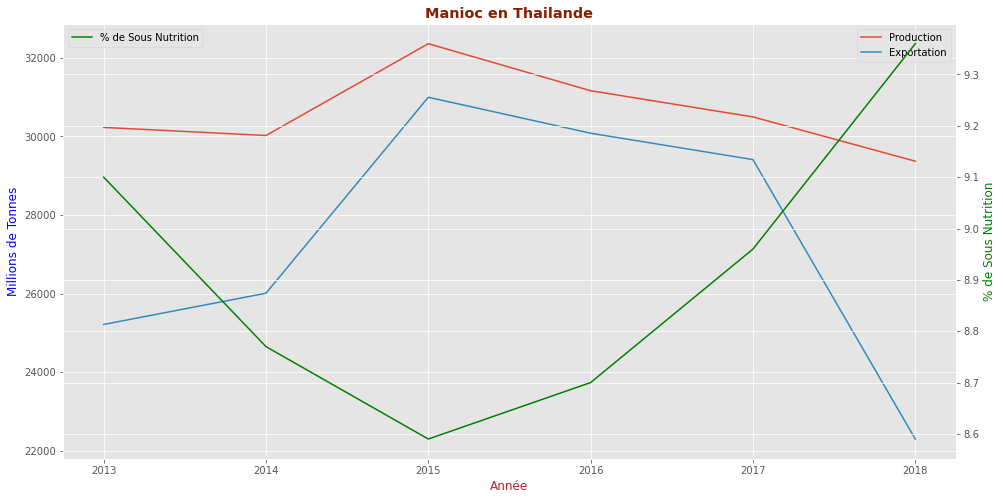

In [177]:
fig = plt.figure(figsize=(16,8)) # Taillle de la figure
ax1 = fig.add_subplot(111) # Ajout d'un axe principal
ax2 = ax1.twinx() # Ajout de l'axe secondaire 
ax1.plot(y1['Année'], y1['Valeur'], label ="Production") # Courbe 1 en fonction de l'axe 1
ax1.plot(y2['Année'], y2['Valeur'], label ="Exportation") # Courbe 2 en fonction de l'axe 1
ax2.plot(y3['Année'], y3['prop_en_sous_nut (%)'], color = 'green', label ="% de Sous Nutrition") # Courbe 3 en fonction de l'axe 2
plt.title("Manioc en Thailande", color = '#861e00', fontweight = 'bold') # titre du graphique
ax1.set_ylabel('Millions de Tonnes', color='blue') #Titre axe 1 pour Y
ax2.set_ylabel('% de Sous Nutrition', color='green') #Titre axe 2 pour Y
ax1.set_xlabel('Année', color='brown') #Titre axe pour X
ax1.legend(loc=0)
ax2.legend(loc=0)
plt.show()